<a href="https://colab.research.google.com/github/joaotinti75/Machine-Learning/blob/main/Aula_RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação das bibliotecas

In [1]:
import cv2
import numpy as np
import os
import zipfile
from google.colab.patches import cv2_imshow
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tf.__version__

'2.9.2'

## Extração pixels da imagem

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Visão Computacional Guia Completo-20230201T234050Z-001/Visão Computacional Guia Completo/Datasets/homer_bart_1.zip'
zip_object = zipfile.ZipFile(file = path, mode='r')

zip_object.extractall('./')
zip_object.close()

In [4]:
diretorio = '/content/homer_bart_1'
arquivos = [os.path.join(diretorio, f) for f in sorted(os.listdir(diretorio))] #ordenando as imagens pelo nome
print(arquivos)

['/content/homer_bart_1/.DS_Store', '/content/homer_bart_1/bart1.bmp', '/content/homer_bart_1/bart10.bmp', '/content/homer_bart_1/bart100.bmp', '/content/homer_bart_1/bart101.bmp', '/content/homer_bart_1/bart102.bmp', '/content/homer_bart_1/bart103.bmp', '/content/homer_bart_1/bart104.bmp', '/content/homer_bart_1/bart105.bmp', '/content/homer_bart_1/bart106.bmp', '/content/homer_bart_1/bart108.bmp', '/content/homer_bart_1/bart109.bmp', '/content/homer_bart_1/bart11.bmp', '/content/homer_bart_1/bart110.bmp', '/content/homer_bart_1/bart111.bmp', '/content/homer_bart_1/bart112.bmp', '/content/homer_bart_1/bart113.bmp', '/content/homer_bart_1/bart114.bmp', '/content/homer_bart_1/bart115.bmp', '/content/homer_bart_1/bart116.bmp', '/content/homer_bart_1/bart117.bmp', '/content/homer_bart_1/bart118.bmp', '/content/homer_bart_1/bart119.bmp', '/content/homer_bart_1/bart12.bmp', '/content/homer_bart_1/bart120.bmp', '/content/homer_bart_1/bart121.bmp', '/content/homer_bart_1/bart122.bmp', '/conte

In [5]:
largura, altura = 128, 128 #redimensionando as imagens

In [25]:
imagens = []
classes = []

In [26]:
for imagem_caminho in arquivos:
  try:
    imagem = cv2.imread(imagem_caminho)
    (H, W) = imagem.shape[:2] #pegando a altura e largura da imagem
  except:
    continue
  
  imagem = cv2.resize(imagem, (largura, altura))
  imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

  imagem = imagem.ravel() #transforma a matriz de imagem em um vetor
  imagens.append(imagem)
  nome_imagem = os.path.basename(os.path.normpath(imagem_caminho))
  if nome_imagem.startswith('b'):
    classe = 0
  else:
    classe = 1
    
  classes.append(classe)


In [27]:
imagens[100], classes[100]

(array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 0)

In [28]:
imagens[200], classes[200]

(array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 1)

In [29]:
type(imagens), type(classes)

(list, list)

In [30]:
X = np.asarray(imagens)
y = np.asarray(classes)

In [31]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [32]:
X.shape

(269, 16384)

In [33]:
y.shape

(269,)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


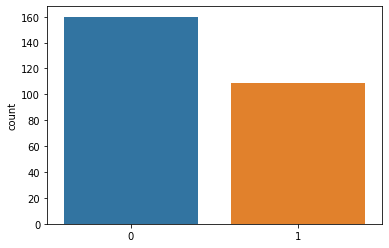

In [34]:
sns.countplot(y) #Quantidade de imagens de acordo com a classe (temos mais imagens do bart do que do homer)

In [35]:
np.unique(y, return_counts=True) #160 imagens do bart e 109 imagens do homer

(array([0, 1]), array([160, 109]))

## Normalização dos dados

In [36]:
X[0].max(), X[0].min()

(255, 0)

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [40]:
X[0].max(), y[0].min()

(1.0000000000000002, 0)

In [42]:
X[1]

array([0.9947644 , 0.99479167, 0.99479167, ..., 0.99559471, 0.99595142,
       0.9950495 ])

## Bases de treinamento e teste

In [43]:
X.shape

(269, 16384)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=1)
#Quanto maior a base de dados, maior a porcentagem você pode deixar para teste
#O parâmetro random_state garante que sempre que você executar esse código, ele escolherá os mesmos registros para treino e teste


In [48]:
X_treinamento.shape, y_treinamento.shape

((215, 16384), (215,))

In [49]:
X_teste.shape, y_teste.shape

((54, 16384), (54,))

## Construção e treinamento da rede neural

In [51]:
# Qual a quantidade ideal de neurônios na primeira camada escondida?
# 16384 é o número de neurônios na camada de entrada
#O 2 que está somando é pq temos apenas 2 classes

(16384 + 2) / 2 

8193.0

In [59]:
#16384 (camada de entrada) -> 8193 (1° camada escondida) -> 8193 (2° camada escondida)
#Rede neural densa é onde todos os neurônios de uma camada estão ligados à todos os neurônios da camada seguinte
network1 = tf.keras.models.Sequential() #redes neurais são uma sequência de camadas, por isso o nome
network1.add(tf.keras.layers.Dense(input_shape=(16384,), units= 8193, activation='relu')) #dense pq 1 neurônio está ligado a todos os outros neurônios da próxima camada
#relu retorna 0 quando o número é negativo, e 1 quando é positivo

network1.add(tf.keras.layers.Dense(units= 8193, activation='relu'))
network1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [60]:
network1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8193)              134242305 
                                                                 
 dense_5 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_6 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201,383,941
Trainable params: 201,383,941
Non-trainable params: 0
_________________________________________________________________


In [55]:
# Total params é o total de pesos que devemos treinar nessa arquitetura de rede neural   

In [61]:
network1.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy']) #O Adam é uma melhoria do GD
#binary é pq temos apenas 2 classes
#accuracy é a taxa de acerto que obtemos no final


In [62]:
historico = network1.fit(X_treinamento, y_treinamento, epochs = 100)
#essa variavel historico retorna um conjunto de informacoes sobre o treinamento

Epoch 1/100
7/7 [==============================] - 1s 48ms/step - loss: 120.9301 - accuracy: 0.5395
Epoch 2/100
7/7 [==============================] - 0s 46ms/step - loss: 7.9877 - accuracy: 0.5209
Epoch 3/100
7/7 [==============================] - 0s 45ms/step - loss: 3.1314 - accuracy: 0.4791
Epoch 4/100
7/7 [==============================] - 0s 45ms/step - loss: 0.9028 - accuracy: 0.5070
Epoch 5/100
7/7 [==============================] - 0s 45ms/step - loss: 0.7275 - accuracy: 0.5349
Epoch 6/100
7/7 [==============================] - 0s 45ms/step - loss: 0.6606 - accuracy: 0.6140
Epoch 7/100
7/7 [==============================] - 0s 45ms/step - loss: 0.6353 - accuracy: 0.6837
Epoch 8/100
7/7 [==============================] - 0s 46ms/step - loss: 0.6658 - accuracy: 0.5767
Epoch 9/100
7/7 [==============================] - 0s 45ms/step - loss: 0.6962 - accuracy: 0.6372
Epoch 10/100
7/7 [==============================] - 0s 47ms/step - loss: 0.6543 - accuracy: 0.6605
Epoch 11/100
7/7 

## Aprendizado durante o treinamento



In [63]:
historico.history.keys()

dict_keys(['loss', 'accuracy'])

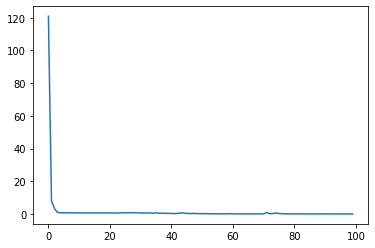

In [65]:
plt.plot(historico.history['loss']);

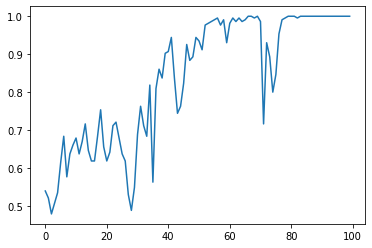

In [66]:
plt.plot(historico.history['accuracy']);

In [67]:
previsoes = network1.predict(X_teste)
previsoes

2/2 [==============================] - 0s 8ms/step


array([[2.2132117e-03],
       [9.8920447e-01],
       [2.4710582e-03],
       [6.3772039e-03],
       [5.9275663e-01],
       [7.1450071e-03],
       [9.8925155e-01],
       [9.1738021e-01],
       [1.1314107e-01],
       [7.8475392e-01],
       [7.6653818e-03],
       [9.8925155e-01],
       [9.0929842e-01],
       [6.6326708e-01],
       [4.2913239e-02],
       [4.4671264e-03],
       [7.8981712e-02],
       [6.0457939e-01],
       [5.9956163e-03],
       [2.6146739e-03],
       [2.2436620e-03],
       [6.5815848e-01],
       [5.0460580e-03],
       [4.0071264e-02],
       [1.7017521e-02],
       [5.2486759e-01],
       [3.4547020e-03],
       [8.4448801e-03],
       [1.9047737e-02],
       [9.4620639e-01],
       [8.3466932e-02],
       [9.8923129e-01],
       [6.0817015e-01],
       [8.2453084e-04],
       [9.8925155e-01],
       [5.2201375e-03],
       [1.8766792e-01],
       [1.8747984e-03],
       [1.6967753e-01],
       [1.3473360e-03],
       [9.7463316e-01],
       [9.311026

In [68]:
#0 False Bart
#1 True Homer
previsoes = (previsoes > 0.5) #se for maior que 50%, a classe é homer
previsoes

array([[False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False]])

In [69]:
y_teste

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_teste, previsoes)

0.7222222222222222

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_teste, previsoes)
cm

array([[23,  5],
       [10, 16]])

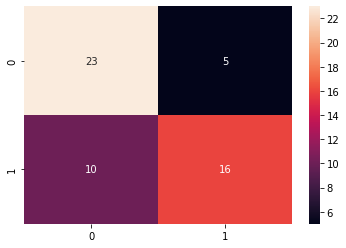

In [72]:
sns.heatmap(cm, annot=True);

In [73]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, previsoes))
#recall. 0.82 na classe Bart significa que o algoritmo consegue identificar 82% das imagens do bart, e quando identifica, está correto em 70%
#recall. 0.62 na classe Homer significa que o algoritmo consegue identificar 62% das imagens do homer, e quando identifica, está correto em 76% 

              precision    recall  f1-score   support

           0       0.70      0.82      0.75        28
           1       0.76      0.62      0.68        26

    accuracy                           0.72        54
   macro avg       0.73      0.72      0.72        54
weighted avg       0.73      0.72      0.72        54



## Salvar e carregar a rede neural

In [74]:
#Esse código armazena apenas a estrutura da rede neural
model_json = network1.to_json()
with open('network1.json', 'w') as json_file:
  json_file.write(model_json)

In [75]:
from keras.models import save_model
network1_saved = save_model(network1, 'weights1.hdf5') #Esse arquivo tem 2,25 GB

In [76]:
#Carregando os dados da estrutura da rede neural
with open('network1.json') as json_file:
  json_saved_model = json_file.read()

json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential_2", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 16384], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_4_input"}}, {"class_name": "Dense", "config": {"name": "dense_4", "trainable": true, "batch_input_shape": [null, 16384], "dtype": "float32", "units": 8193, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_5", "trainable": true, "dtype": "float32", "units": 8193, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regulariz

In [78]:
# Carregando a rede neural
network1_loaded = tf.keras.models.model_from_json(json_saved_model)
network1_loaded.load_weights('/content/weights1.hdf5')
network1_loaded.compile(loss= 'binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [79]:
network1_loaded.summary() # Para nos certificarmos que a rede foi carregada corretamente

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8193)              134242305 
                                                                 
 dense_5 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_6 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201,383,941
Trainable params: 201,383,941
Non-trainable params: 0
_________________________________________________________________


## Classificação de uma imagem

In [80]:
X_teste[0], y_teste[0]

(array([1., 1., 1., ..., 1., 1., 1.]), 0)

In [82]:
X_teste[0].shape

(16384,)

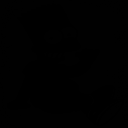

In [83]:
cv2_imshow(X_teste[0].reshape(128, 128)) #imagem preta pois haviamos normalizado os dados

In [89]:
imagem_teste = X_teste[1]
imagem_teste = scaler.inverse_transform(imagem_teste.reshape(1,-1))

imagem_teste

array([[255., 255., 255., ...,  28., 255., 255.]])

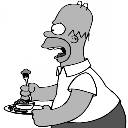

In [90]:
cv2_imshow(imagem_teste.reshape(128,128))

In [91]:
network1_loaded.predict(imagem_teste)[0][0] #Ou seja, você não precisa enviar a imagem vetorizada e normalizada para a rede, só enviar a imagem normal


1/1 [==============================] - 0s 20ms/step


0.99861944

In [92]:
if network1_loaded.predict(imagem_teste)[0][0] < 0.5:
  print('Bart')
else:
  print('Homer')

1/1 [==============================] - 0s 20ms/step
Homer
